# Term Deposit Subscription Prediction

#### Problem Statement:
A Portuguese Banking Institution has provided data related to direct marketing campaigns. The campaigns were based on phone calls to their customers in order to offer term deposit subscriptions. In this project, we will build a model which predicts the clients who are more likely to subscribe to a term deposit as well as identify the main factors that affect the clients’ decision.
#### Objectives:
* Build a classification model to predict whether a client subscribes to term subscription.
* Identify the main features that affects the customers' decision.

### Functions used in this kernal

In [282]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualzation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from pylab import *

# machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from scipy.stats import mannwhitneyu, boxcox
from sklearn.metrics import accuracy_score

from IPython.display import display

def anaplot(X, ch, cb):
    subplot(1,2,1)
    plt.hist(train_df[X], bins=20, color=ch, edgecolor='black');
    title(X)
    subplot(1,2,2)
    title(X + " by subscription")
    sns.boxplot(x=train_df['y'], y = train_df[X], color=cb)

### Data Loading and overview
<p>Data is available as a single dataset. It contains Bank Client Data (Input Variables) and Some other attributes such as pdays etc. The output variable is however a YES or NO based on if the particular client has subscribes to the term deposit.

In [283]:
folder_path = './'
train = pd.read_csv(f'{folder_path}train.csv')
testc = pd.read_csv(f'{folder_path}test.csv')
test = testc
combine = [train, test]
print(f'Train data set has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test data set has {test.shape[0]} rows and {test.shape[1]} columns.')

Train data set has 32978 rows and 22 columns.
Test data set has 8210 rows and 21 columns.


So we have two datasets one medium-sized and another small-sized. Train and test have similar number of columns.

D:\Anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


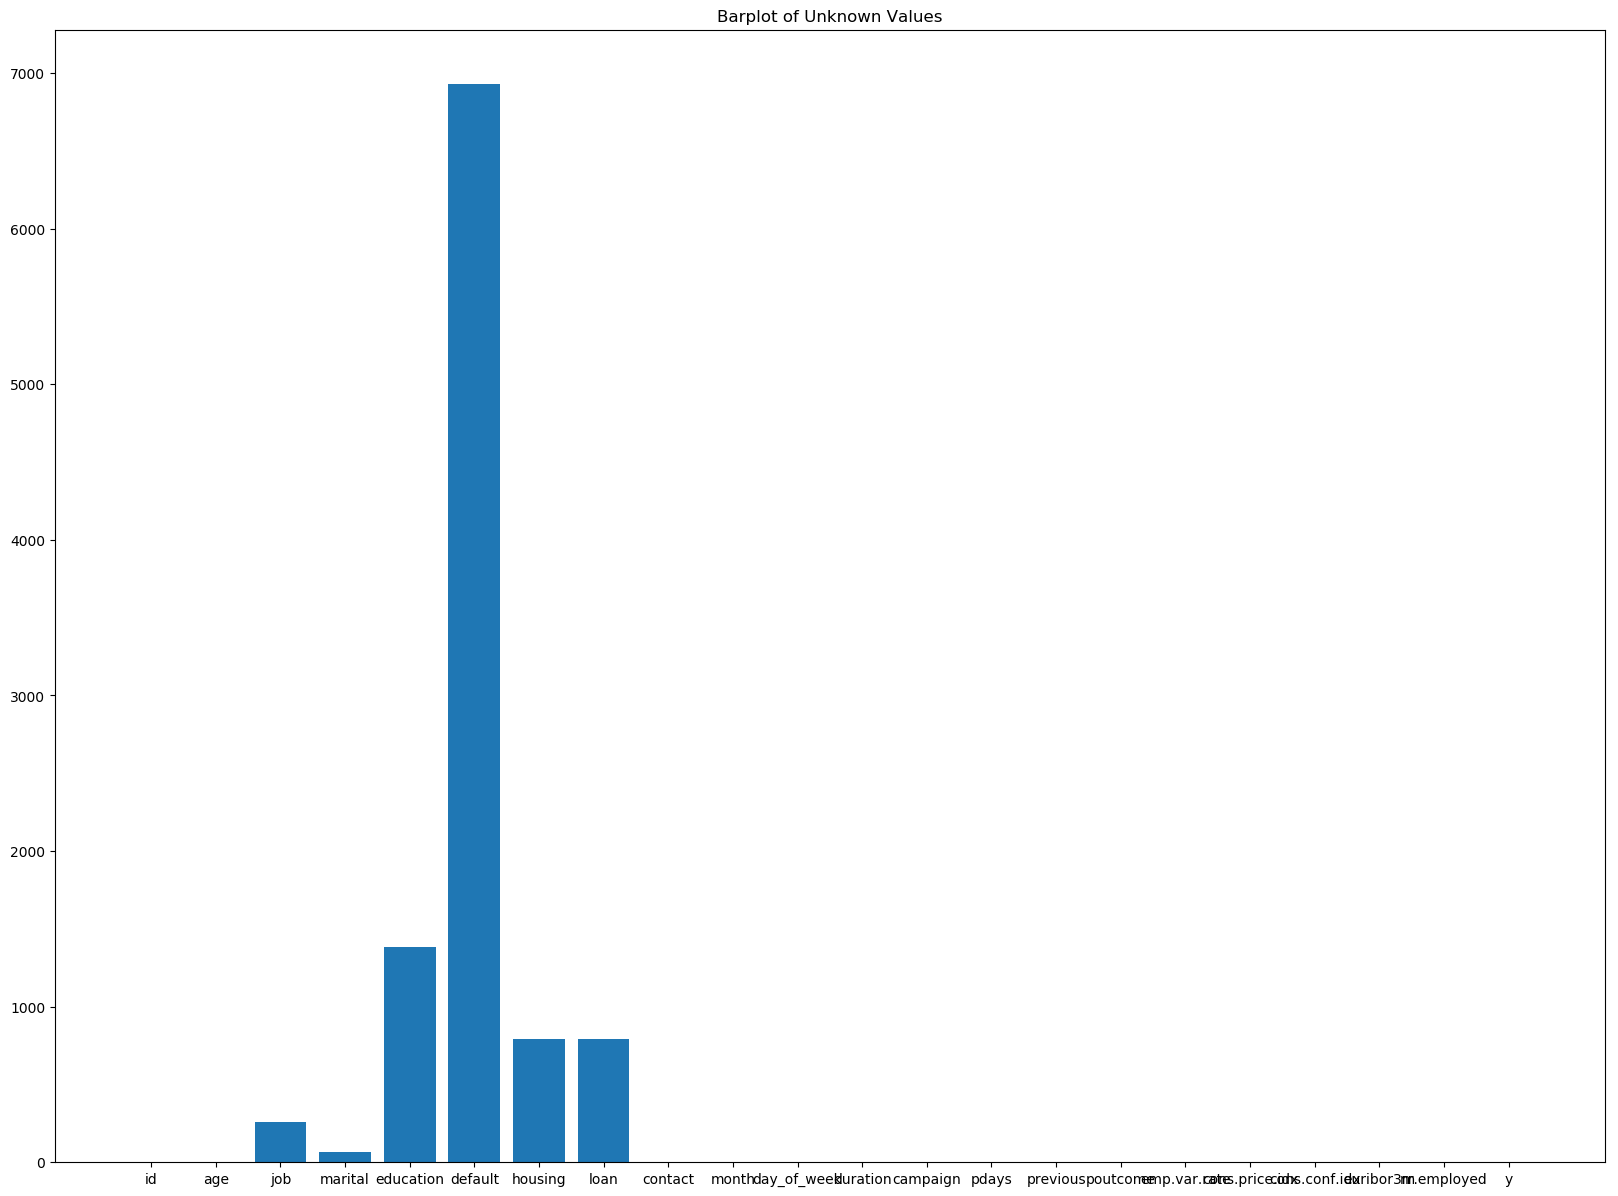

In [284]:
c = (train == 'unknown').sum(axis=0)
C = pd.DataFrame(c)
fig, axes = plt.subplots(figsize=(20,15), dpi=100)
plt.bar(C.index, height=C[0])
plt.title('Barplot of Unknown Values');

In [285]:
train = train.replace('unknown', None);
train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Preprocessing And EDA
### Missing Values Imputation
There are a number of different methods to handle missing data. Since the attributes with missing values are categorical with more than two factors, we will use Multivariate Imputation by Chained Equations (MICE) with polytomous regression. In Figure 2 we compare the distribution of the original data and the imputed outcome. We can see that the bar plots are quite similar which means that the MICE imputation is accurate.

In [286]:
le = preprocessing.LabelEncoder()
train.job = le.fit_transform(train.job)
train.marital = le.fit_transform(train.marital)
train.education = le.fit_transform(train.education)
train.default = le.fit_transform(train.default)
train.housing = le.fit_transform(train.housing)
train.loan = le.fit_transform(train.loan)
train.contact = le.fit_transform(train.contact)
train.month = le.fit_transform(train.month)
train.day_of_week = le.fit_transform(train.day_of_week)
train.poutcome = le.fit_transform(train.poutcome)
train.y = le.fit_transform(train.y)
nan = np.nan
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(train)
train_mod = np.round(imp.transform(train))

test.job = le.fit_transform(test.job)
test.marital = le.fit_transform(test.marital)
test.education = le.fit_transform(test.education)
test.default = le.fit_transform(test.default)
test.housing = le.fit_transform(test.housing)
test.loan = le.fit_transform(test.loan)
test.contact = le.fit_transform(test.contact)
test.month = le.fit_transform(test.month)
test.day_of_week = le.fit_transform(test.day_of_week)
test.poutcome = le.fit_transform(test.poutcome)
nan = np.nan
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(test)
test_mod = np.round(imp.transform(test))

In [287]:
train_df = pd.DataFrame(train_mod)
train_df.columns = train.transpose().index
test_df = pd.DataFrame(test_mod)
test_df.columns = test.transpose().index
train_df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,56.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,...,1.0,999.0,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0.0
1,1.0,57.0,7.0,1.0,3.0,0.0,0.0,0.0,1.0,6.0,...,1.0,999.0,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0.0
2,2.0,37.0,7.0,1.0,3.0,0.0,1.0,0.0,1.0,6.0,...,1.0,999.0,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0.0
3,4.0,56.0,7.0,1.0,3.0,0.0,0.0,1.0,1.0,6.0,...,1.0,999.0,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0.0
4,5.0,45.0,7.0,1.0,2.0,0.0,0.0,0.0,1.0,6.0,...,1.0,999.0,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0.0


#### Graphical Results(Numerical Features)

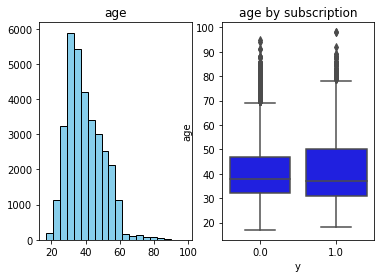

In [288]:
anaplot('age', 'skyblue', 'blue')

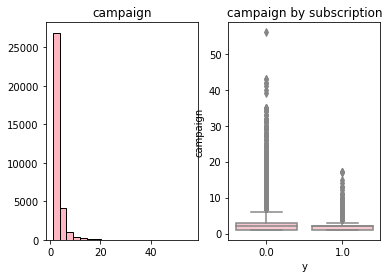

In [289]:
anaplot('campaign', 'lightpink', 'pink')

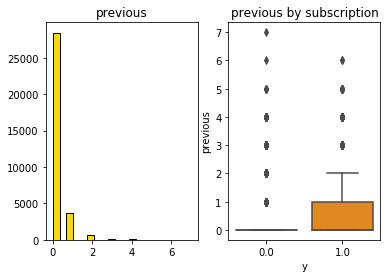

In [290]:
anaplot('previous', 'gold', 'darkorange')

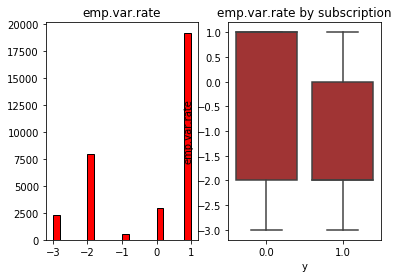

In [291]:
anaplot('emp.var.rate', 'red', 'firebrick')

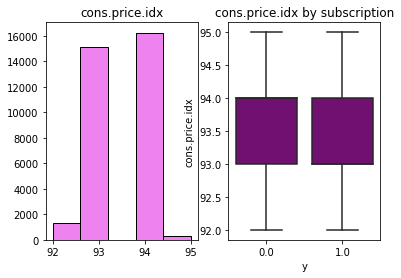

In [292]:
subplot(1,2,1)
plt.hist(train_df['cons.price.idx'], bins=5, color='violet', edgecolor='black');
title('cons.price.idx')
subplot(1,2,2)
title("cons.price.idx by subscription")
sns.boxplot(x=train_df['y'], y = train_df['cons.price.idx'], color='purple')

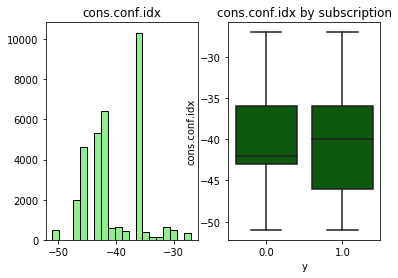

In [293]:
anaplot('cons.conf.idx', 'lightgreen', 'darkgreen')

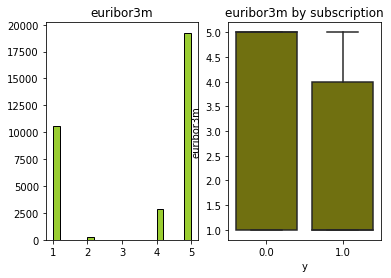

In [294]:
anaplot('euribor3m', 'yellowgreen', 'olive')

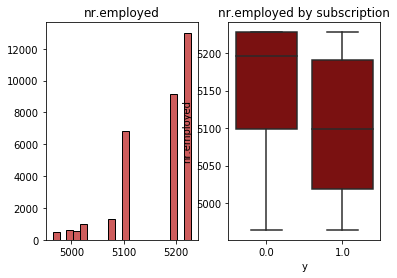

In [295]:
anaplot('nr.employed', 'indianred', 'darkred')

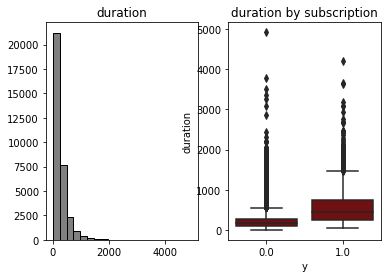

In [296]:
anaplot('duration', 'grey', 'maroon')

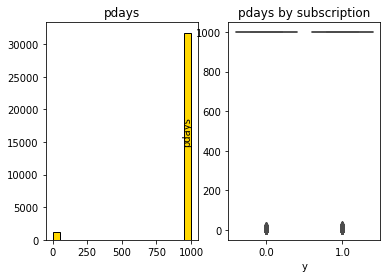

In [297]:
anaplot('pdays', 'gold', 'yellowgreen')

#### Summary key points

* 75% of the clients are younger than 47 years old.
* 2% of the clients are older than 60 years old.
* The average age for subscribed and non-subscribed clients is quite similar (41 and 40 years old, respectably).
* There is no significant difference in the age of clients by groups, indicating little association between age and subscription.
* 75% of clients were contacted less than three times during this campaign.
* Of the clients contacted once in this campaign, 82% had not been contacted previously.
* The employment variation rate median of subscribed clients is almost 3 points lower than the median employment variation rate of non-subscribed clients.
* The average consumer price index is similar for groups: 93.41 for subscribed clients and 93.59 for non-subscribe clients.
* The consumer confidence index by non-subscribed and subscribed clients does not show an important difference: -40.58 non-subscribed clients and -39.78 subscribed clients.
* The subscribed group in Euribor 3 month rate shows a lower median and is more variable than non-subscribed clients. The bimodal shape suggests that there are two distinct groups: the low interest rate clients and the high interest rate clients.
* There is significant difference in the duration of the call between subscribed and non-subscribed clients. The subscribed-clients show a median call of 7.63 minutes, instead, 50% of non-subscribed clients were on the phone less than 2.75 minutes. Subscribed clients spent more time on the phone during the call.
* 64% of the clients were contacted via telephone. 5% of these resulted in a subscription.
* 36% of the clients were contacted via cellular, 14% of these resulted in a subscription.
* Cellular is the type of contact with the highest subscription rate.
* Telephone calls that finished with a subscription were longer than cellular calls that ended with a subscription.
* Clients for who the previous campaign was successful are more likely to subscribe for a term deposit.

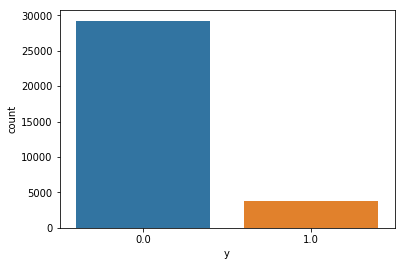

In [298]:
sns.countplot(x='y',data=train_df)

y is very skewed, we will repeat the existing 'yes' and copy them in this.

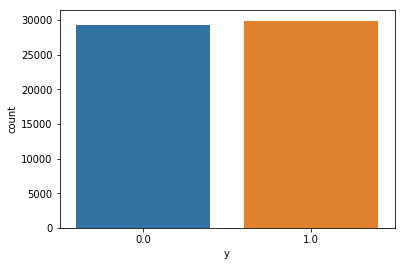

In [299]:
d1=train_df.copy()
d2=d1[d1.y==1]
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])

train_df=d1
sns.countplot(x='y',data=train_df)

We will split pdays into two seperate columns as the barplot explains it having having two values.

In [300]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
test_df['pdays2']=test_df.apply(lambda row: function(row),axis=1)
train_df['pdays2']=train_df.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
test_df['pdays']=test_df.apply(lambda row: function1(row),axis=1)
train_df['pdays']=train_df.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
train_df['pdays']=train_df['pdays'].astype(int)
test_df['pdays']=test_df['pdays'].astype(int)
test_df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays2
0,3.0,40.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,...,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0
1,6.0,59.0,0.0,1.0,5.0,0.0,0.0,0.0,1.0,6.0,...,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0
2,10.0,41.0,1.0,1.0,7.0,1.0,0.0,0.0,1.0,6.0,...,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0
3,11.0,25.0,7.0,2.0,3.0,0.0,2.0,0.0,1.0,6.0,...,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0
4,13.0,57.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,6.0,...,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0


In [301]:
train_df = train_df.drop(['id', 'default'], axis=1)
test_df = test_df.drop(['id', 'default'], axis=1)
test_df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays2
0,40.0,0.0,1.0,1.0,0.0,0.0,1.0,6.0,1.0,151.0,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0
1,59.0,0.0,1.0,5.0,0.0,0.0,1.0,6.0,1.0,139.0,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0
2,41.0,1.0,1.0,7.0,0.0,0.0,1.0,6.0,1.0,55.0,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0
3,25.0,7.0,2.0,3.0,2.0,0.0,1.0,6.0,1.0,222.0,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0
4,57.0,3.0,0.0,0.0,2.0,0.0,1.0,6.0,1.0,293.0,1.0,30,0.0,1.0,1.0,94.0,-36.0,5.0,5191.0,0


In [302]:
idx_numeric=[0,6,12,13,14,15]
scaler = MinMaxScaler()
train_df[train_df.columns[idx_numeric]] = scaler.fit_transform(train_df[train_df.columns[idx_numeric]])
test_df[test_df.columns[idx_numeric]] = scaler.fit_transform(test_df[test_df.columns[idx_numeric]])
train_df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.481481,3.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,261.0,...,30,0.0,0.5,1.0,0.666667,-36.0,5.0,5191.0,0.0,0
1,0.493827,7.0,1.0,3.0,0.0,0.0,1.0,6.0,1.0,149.0,...,30,0.0,0.5,1.0,0.666667,-36.0,5.0,5191.0,0.0,0
2,0.246914,7.0,1.0,3.0,1.0,0.0,1.0,6.0,1.0,226.0,...,30,0.0,0.5,1.0,0.666667,-36.0,5.0,5191.0,0.0,0
3,0.481481,7.0,1.0,3.0,0.0,1.0,1.0,6.0,1.0,307.0,...,30,0.0,0.5,1.0,0.666667,-36.0,5.0,5191.0,0.0,0
4,0.345679,7.0,1.0,2.0,0.0,0.0,1.0,6.0,1.0,198.0,...,30,0.0,0.5,1.0,0.666667,-36.0,5.0,5191.0,0.0,0


### Predictors
Based on the exploratory data analysis and the inferential analysis, we identified the attributes more likely to affect the client’s subscription. These attributes will be called “predictors” and they are: age, job, marital education, contact, month, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, duration.

In [304]:
x_train = train_df.drop('y', axis=1).values
y_train = train_df['y'].values
pp = train_df.drop('y', axis=1)
x_train.shape,y_train.shape

((59137, 20), (59137,))

In [305]:
rfc = RandomForestClassifier(n_estimators=114, random_state = 42)
rfc.fit(x_train, y_train)
predict  = rfc.predict(test_df)
accuracy_score(rfc.predict(x_train), y_train)

1.0

In [306]:
import csv

train = pd.read_csv('test.csv')

with open('foo1.csv', 'w', newline='') as f:
    thewriter = csv.writer(f)
    count = 0
    thewriter.writerow(['id', 'y'])
    
    for i in predict:
        count = count + 1
        if (i == 0): thewriter.writerow([train.id[count - 1], 'no'])
        else: thewriter.writerow([train.id[count - 1], 'yes'])

In [307]:
pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

,importance
duration,0.424485
nr.employed,0.082369
age,0.072012
euribor3m,0.065814
emp.var.rate,0.041317
cons.conf.idx,0.037215
job,0.035972
day_of_week,0.034325
campaign,0.033853
education,0.030792


## Conclusion
In this project we aimed to build a model to predict whether the client will subscribe to a term deposit and identify the main attributes that affect the subscription.

In order to identify the predictors, we conducted several hypothesis testing and we ended up with 19 predictors.